<a href="https://colab.research.google.com/github/ROARMarketingConcepts/Machine-Learning-Projects/blob/master/Predicting_House_Prices_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting House Prices- Data Regression Problem

Performed by
Ken Wood

ken@roarmarketingconcepts.com

### We will apply linear regression with regularization (Ridge & Lasso algorithms) to a housing dataset to predict sale prices. Our metric for gauging the model's effectiveness is the Root Mean Square Log Error (RMSLE) of the model predictions $\hat{y}$, as compared with the actual label values $y$ (SalePrice).  

### $m$ training samples, $n$ features per sample


### Ridge Cost function:

### Cost = $\sum_{i=1}^{m}(y_i - \sum_{j=0}^{n}w_jx_{ij})^2 + \lambda\sum_{j=0}^{n}w_j^2$


### Lasso Cost function:

### Cost = $\sum_{i=1}^{m}(y_i - \sum_{j=0}^{n}w_jx_{ij})^2 + \lambda\sum_{j=0}^{n}|w_j|$


### RMSLE = $\sqrt{\dfrac{1}{n}\,\sum_{i=1}^{m}{[(\log(y_i+1) - \log(\hat{y_i}+1)]}\,^2}$



---



### Mount my Google Drive where the train.csv and test.csv datasets are located...

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


### Install some necessary packages to perform the required analysis...

In [0]:
!pip install -U scikit-learn
!pip install --user --upgrade tables
import pandas as pd
import numpy as np
import sklearn
import scipy

import matplotlib.pyplot as plt
from matplotlib import interactive
plt.rc("font", size=14)
from pylab import scatter, show, legend, xlabel, ylabel

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.20.2)
Requirement already up-to-date: tables in /usr/local/lib/python3.6/dist-packages (3.4.4)


### Load the train and test datasets...

In [0]:
train_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/House Prices: Advanced Regression Techniques/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/House Prices: Advanced Regression Techniques/test.csv')

### Let's look at some properties of the 'train' dataset...

In [0]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [0]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Now, let's look at some properties of the test dataset...

In [0]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

### Let's compute the correlation matrix for target variable $y$, 'SalePrice'.

In [0]:
corr_matrix = train_data.corr()
corr_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [0]:
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

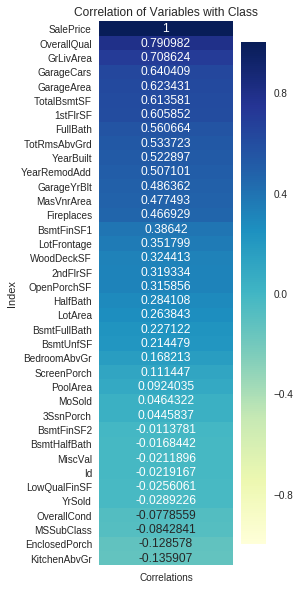

In [0]:
import seaborn as sns

corr = train_data.corr()
corr = corr['SalePrice'].reset_index()
corr.columns = ['Index','Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending = False)
plt.figure(figsize=(3,10))
fig = sns.heatmap(corr, annot=True, fmt="g", cmap='YlGnBu')
plt.title("Correlation of Variables with Class")
plt.show()

### Set the 'SalePrice' as the dependent $y$ variable and drop this column from the train_set.

In [0]:
y = train_data['SalePrice']
train_data = train_data.drop('SalePrice',axis=1)
print('Shape of train set:',train_data.shape)
print('Shape of test set:',test_data.shape)

Shape of train set: (1460, 80)
Shape of test set: (1459, 80)


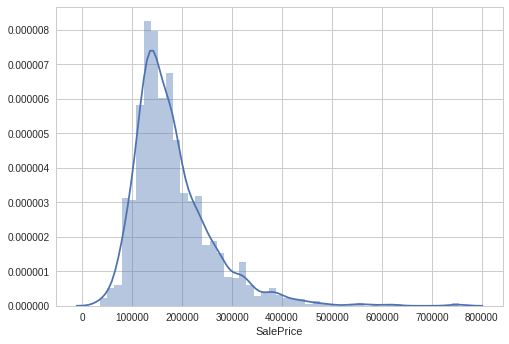

In [0]:
ax = sns.distplot(y)

### Combine the train and test datasets together to perform cleaning, coding, and feature scaling.

In [0]:
all_data = pd.concat([train_data,test_data])
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

### Let's identify the feature columns that contain missing values and determine how many values are missing in each column.

In [0]:
missing_values = all_data.columns[all_data.isnull().any()].tolist()

In [0]:
for header in missing_values:
  print(header,all_data[header].isnull().sum())

MSZoning 4
LotFrontage 486
Alley 2721
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 24
MasVnrArea 23
BsmtQual 81
BsmtCond 82
BsmtExposure 82
BsmtFinType1 79
BsmtFinSF1 1
BsmtFinType2 80
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
Electrical 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
FireplaceQu 1420
GarageType 157
GarageYrBlt 159
GarageFinish 159
GarageCars 1
GarageArea 1
GarageQual 159
GarageCond 159
PoolQC 2909
Fence 2348
MiscFeature 2814
SaleType 1


### We will remove the columns that have more than 2000 values missing...

In [0]:
columns = ['Alley','PoolQC','Fence','MiscFeature']

all_data = all_data.drop(columns,axis=1)

### Let's replace the 'NaN' fields in the data object columns with suitable replacement values.

In [0]:
columns = ['BsmtQual','BsmtCond','BsmtExposure','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','BsmtFinType1','BsmtFinType2']

for col in columns:
  all_data[col].fillna('NA',inplace=True)

In [0]:
all_data['MasVnrType'].fillna('None',inplace=True)
all_data['Electrical'].fillna('SBkr',inplace=True)

### Now, let's use the 'SimpleImputer' function from sklearn to replace missing values in the numerical variable columns which are 'LotFrontage', 'MasVnrArea', 'GarageYrBlt'. As a first pass, we will impute the median column value for each missing value.

In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ="median")

In [0]:
columns = ['LotFrontage','MasVnrArea','GarageYrBlt']

In [0]:
def ImputeMissingValues(data,columns):
  
  data_numeric = data[columns]                   # Select the 'LotFrontage','MasVnrArea','GarageYrBlt' columns
  
  for col in columns:
    imputer.fit(data_numeric)
    
  X = imputer.transform(data_numeric)            # Impute new values for the missing values
  data_num = pd.DataFrame(X,columns=columns)
  
  for col in columns:                            # Replace the updated columns in the dataset
    data[col] = data_num[col]
    
  return data                                    # Return the updated dataset

In [0]:
all_data = ImputeMissingValues(all_data,columns)
impute_stat = imputer.statistics_
print(impute_stat)

[  68.    0. 1979.]


### Let's look at the 'MSSubClass' header to see if we can determine the correct missing values for 'MSZoning'.

In [0]:
grouping = all_data.groupby(['MSSubClass'])['MSZoning'].value_counts()
print(grouping)

MSSubClass  MSZoning
20          RL          1016
            FV            34
            RM            20
            RH             4
            C (all)        3
30          RM            67
            RL            61
            C (all)        8
            RH             2
40          RL             4
            RM             2
45          RM            11
            RL             6
            RH             1
50          RL           159
            RM           119
            C (all)        7
            RH             2
60          RL           529
            FV            43
            RM             3
70          RM            63
            RL            57
            C (all)        4
            RH             3
75          RM            14
            RL             9
80          RL           115
            RM             3
85          RL            47
            RM             1
90          RL            92
            RM            13
            RH        

In [0]:
indices = np.where(all_data['MSZoning'].isna())                   # Reshape from 2D to 1D numpy array
indices

(array([1915, 2216, 2250, 2904]),)

In [0]:
for idx in indices:
  MSSubClass_values = all_data['MSSubClass'][idx]
  
MSSubClass_values

### Based on the above analysis, let's substitute the value 'RL' for all the missing MSZoning values...

In [0]:
all_data['MSZoning'].fillna('RL',inplace=True) 

### A quick look at the 'Utilities' variable...

In [0]:
all_data['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [0]:
all_data['Utilities'].fillna('AllPub',inplace=True)

In [0]:
all_data['Exterior1st'].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
Stone         2
AsphShn       2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [0]:
all_data['Exterior1st'].fillna('VinylSd',inplace=True)

In [0]:
all_data['Exterior2nd'].value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [0]:
all_data['Exterior2nd'].fillna('VinylSd',inplace=True)

In [0]:
all_data['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [0]:
all_data['KitchenQual'].fillna('TA',inplace=True)

In [0]:
all_data['Functional'].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [0]:
all_data['Functional'].fillna('Typ',inplace=True)

In [0]:
all_data['SaleType'].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [0]:
all_data['SaleType'].fillna('WD',inplace=True)

In [0]:
null_list = all_data.columns[all_data.isnull().any()].tolist()

In [0]:
for header in null_list:
  print(header,all_data[header].isnull().sum())

BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
GarageCars 1
GarageArea 1


In [0]:
all_data = ImputeMissingValues(all_data,null_list)
impute_stat = imputer.statistics_
print(impute_stat)

[368.5   0.  467.  989.5   0.    0.    2.  480. ]


In [0]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 76 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non

### We have now addressed all the missing values in both the train and test datasets. Now we need to code all the categorical variables and then feature-scale everything...

### First, let's separate the numerical and categorical variables so that we can encode them.

In [0]:
all_data_cat = all_data.select_dtypes(include=['object'])
print('Shape of all_data_cat:',all_data_cat.shape)

all_data_num = all_data.select_dtypes(exclude=['object'])
print('Shape of all_data_num:',all_data_num.shape)

Shape of all_data_cat: (2919, 39)
Shape of all_data_num: (2919, 37)


In [0]:
from sklearn.preprocessing import OrdinalEncoder

In [0]:
def CatVariableEncoder(data):
  data=data.values                   # Convert to numpy array
  data=data.reshape(-1,1)
  ordinal_encoder = OrdinalEncoder()
  data_encoded = ordinal_encoder.fit_transform(data)
  return data_encoded

In [0]:
all_data_cat_encoded = CatVariableEncoder(all_data_cat)
all_data_cat_encoded[:10]

array([[128.],
       [121.],
       [135.],
       [ 86.],
       [ 12.],
       [ 84.],
       [ 75.],
       [ 41.],
       [111.],
       [111.]])

### Sklearn provides a 'OneHotEncoder' function to convert integer categorical values into one-hot vectors. 


In [0]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories='auto')
all_data_cat_1hot = encoder.fit_transform(all_data_cat_encoded.reshape(-1,1))
print(all_data_cat_1hot)

  (0, 128)	1.0
  (1, 121)	1.0
  (2, 135)	1.0
  (3, 86)	1.0
  (4, 12)	1.0
  (5, 84)	1.0
  (6, 75)	1.0
  (7, 41)	1.0
  (8, 111)	1.0
  (9, 111)	1.0
  (10, 2)	1.0
  (11, 6)	1.0
  (12, 67)	1.0
  (13, 42)	1.0
  (14, 159)	1.0
  (15, 159)	1.0
  (16, 28)	1.0
  (17, 71)	1.0
  (18, 151)	1.0
  (19, 119)	1.0
  (20, 71)	1.0
  (21, 151)	1.0
  (22, 107)	1.0
  (23, 66)	1.0
  (24, 157)	1.0
  :	:
  (113816, 77)	1.0
  (113817, 77)	1.0
  (113818, 28)	1.0
  (113819, 151)	1.0
  (113820, 151)	1.0
  (113821, 119)	1.0
  (113822, 71)	1.0
  (113823, 151)	1.0
  (113824, 18)	1.0
  (113825, 87)	1.0
  (113826, 157)	1.0
  (113827, 69)	1.0
  (113828, 53)	1.0
  (113829, 168)	1.0
  (113830, 138)	1.0
  (113831, 151)	1.0
  (113832, 156)	1.0
  (113833, 151)	1.0
  (113834, 17)	1.0
  (113835, 60)	1.0
  (113836, 151)	1.0
  (113837, 151)	1.0
  (113838, 168)	1.0
  (113839, 160)	1.0
  (113840, 112)	1.0


In [0]:
all_data_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Let's create pipelines for transforming both the numerical and categorical variables. 

In [0]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

### Now it would be nice if we could feed a Pandas DataFrame containing non-numerical columns directly into our pipeline, instead of having to first manually extract the numerical columns into a NumPy array. Now we can use the recently-introduced sklearn function **'ColumnTransformer'** to do this work for us.

In [0]:
all_data_num_tr = num_pipeline.fit_transform(all_data_num)

In [0]:
from sklearn.compose import ColumnTransformer

num_attribs = list(all_data_num) 
cat_attribs = list(all_data_cat)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [0]:
all_data_prepared = full_pipeline.fit_transform(all_data)

In [0]:
all_data_prepared

<2919x287 sparse matrix of type '<class 'numpy.float64'>'
	with 221843 stored elements in Compressed Sparse Row format>

### Now, we need to separate 'all_data_prepared' into the prepared train and test sets...

In [0]:
train_data_prepared = all_data_prepared[:1460,]
train_data_prepared

<1460x287 sparse matrix of type '<class 'numpy.float64'>'
	with 110959 stored elements in Compressed Sparse Row format>

In [0]:
test_data_prepared = all_data_prepared[1460:,]
test_data_prepared

<1459x287 sparse matrix of type '<class 'numpy.float64'>'
	with 110884 stored elements in Compressed Sparse Row format>

### We're now ready to train some models!  Let's start the Linear Regression algorithm. 

In [0]:
from sklearn.linear_model import Ridge
ridge = Ridge() 
ridge.fit(train_data_prepared,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

### Let’s measure this regression model’s **RMSLE** on the training set using Scikit-Learn’s 'mean_squared_log_error' function:

In [0]:
from sklearn.metrics import mean_squared_log_error

def Calculate_RMSLE(X,y,model):
  predictions = model.predict(X)
  msle = mean_squared_log_error(y,predictions)
  rmse = np.sqrt(msle)
  return rmse

In [0]:
Calculate_RMSLE(train_data_prepared,y,ridge)

0.11869669162682242

### Wow, the RMSLE seems to be fairly low for the train set! Let's perform a cross-validation dividing the training set into 3 folds and see what kind of RMSLE we get...

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

def rmsle(y, y0):
    assert len(y) == len(y0)
    return np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y0), 2)))

root_mean_square_log_error = make_scorer(rmsle,greater_is_better=False)

ridge_rmsle_scores = cross_val_score(ridge,train_data_prepared,y,scoring=make_scorer(rmsle), cv=3)
ridge_rmsle_scores

array([0.18353982, 0.1682545 , 0.16129525])

In [0]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [0]:
display_scores(ridge_rmsle_scores) 

Scores: [0.18353982 0.1682545  0.16129525]
Mean: 0.17102985666309908
Standard deviation: 0.009290934408949065


### After doing a cross validation, we see that the RMSLE for Ridge LinearRegression is somewhat high.  Let's look at Lasso.

In [0]:
some_predictions = ridge.predict(train_data_prepared[:30])
some_labels = y[:30]
    
print(some_predictions,'\n\n',some_labels)

[208063.69825683 203620.85725851 209502.37172172 179936.57378826
 299923.83791901 154202.57258784 275326.32716287 208442.53309278
 142117.95480029 116867.11438419 131394.44904675 394822.16053536
 135755.59853624 225966.684773   149454.87507904 144585.24167362
 168004.18513156 107893.49808723 148321.85718182 124657.09963953
 333502.15769206 121417.35936042 215403.44206011 140027.69336984
 161106.38545971 257845.07803619 134467.21007381 296770.93313421
 209729.63268317  63105.41865471] 

 0     208500
1     181500
2     223500
3     140000
4     250000
5     143000
6     307000
7     200000
8     129900
9     118000
10    129500
11    345000
12    144000
13    279500
14    157000
15    132000
16    149000
17     90000
18    159000
19    139000
20    325300
21    139400
22    230000
23    129900
24    154000
25    256300
26    134800
27    306000
28    207500
29     68500
Name: SalePrice, dtype: int64


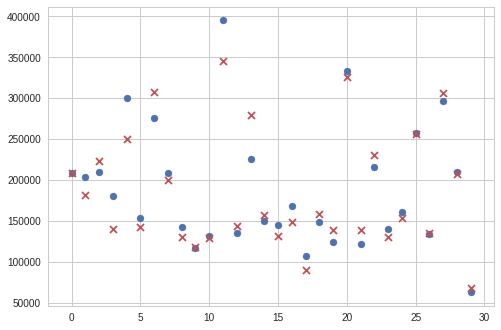

In [0]:
#Creating pandas dataframe from numpy array

df = pd.DataFrame({'Predictions':some_predictions,'Actual':some_labels})
scatter(df.index,some_predictions,marker='o', c='b')
scatter(df.index,some_labels,marker='x', c='r')
plt.figure(); 
# df.plot(); 
# plt.legend(loc='best')

### Let’s train a Linear Regression Lasso Algorithm. 

In [0]:
from sklearn.linear_model import Lasso 
lasso = Lasso() 
lasso.fit(train_data_prepared,y) 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Let's measure the DecisionTreeRegressor model's RMSE...

In [0]:
Calculate_RMSLE(train_data_prepared,y,lasso)

0.11125323987926389

In [0]:
lasso_rmsle_scores = cross_val_score(lasso,train_data_prepared,y,scoring=make_scorer(rmsle), cv=3)
lasso_rmsle_scores

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log1p
  
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


array([0.15031665, 0.17833649, 0.15886858])

In [0]:
display_scores(lasso_rmsle_scores)   

Scores: [0.15031665 0.17833649 0.15886858]
Mean: 0.16250723951226462
Standard deviation: 0.011724836273695381


### Based on these scores, it looks like the Lasso performs *better* than the Ridge Linear Regression.

In [0]:
train_set_RMSLE = Calculate_RMSLE(train_data_prepared,y,ridge)
print(train_set_RMSLE)
print('R2 value for train_set:',ridge.score(train_data_prepared,y))    # R-squared for the train set

0.11869669162682242
R2 value for train_set: 0.9135039321193977


In [0]:
train_set_RMSLE = Calculate_RMSLE(train_data_prepared,y,lasso)
print(train_set_RMSLE)
print('R2 value for train_set:',lasso.score(train_data_prepared,y))    # R-squared for the train set

0.11125323987926389
R2 value for train_set: 0.9313369880037645
